# _Ejercicio 1_
____

<img src="datos_monte_chaco.png" width="1000" height="400">

A continuación se describe, paso a paso, la construcción de una tabla de frecuencias, la realización de una gráfica de barras a partir del histograma de los datos, ojiva y polígono de frecuencias mediante las librerías **_PANDAS_, _Numpy_ y _matplolib_** en python. Todo esto partiendo desde un archivo **.txt** con datos y utilizando el método de **_Sturges_** para el cálculo de las _**clases $(k)$**_.

In [1]:
# Importación de las librerías:

import matplotlib.pyplot as plt
import matplotlib.patches as polygon
from matplotlib.collections import PatchCollection
from scipy import stats
from collections import defaultdict
from bisect import bisect_left
import pandas as pd
import math
import numpy as np
import csv
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

### **Construcción de la tabla de fecuencias**

Los datos son previamente almacenados en una rchivo **.txt** sin ningún orden en especial o tipo de arreglo. Para este ejemplo, dicho archivo es llamado **ejercicio_2.txt**.

Para ello necesitaremos la creación de dos objetos, de tipo _listas_, para la extracción de los datos y visualización. Las llamaremos `listas` y `datos`. Posteriormente se iterará en un _loop_ para su presentación, pero antes es necesario crear un tercer objeto, de tipo arreglo, que nos permitirá reailzar los cálculos pertinentes sobre cada dato. Lo llamaremos `np_datos`:

#### _Medidas de posición: núumero total de datos ($N$), máximos, mínimos y rango._

Todas las medidas de posición son calculadas utilizando el objeto `np_datos` y las funciones pertinentes de **_Numpy_**:

In [2]:
# Carga de los datos mediante la lectura del archivo fuente.txt:

listas = []
datos=[]

with open('data_monte_chaco.txt', newline='') as archivo:
    for linea in csv.reader(archivo):
        listas.append(linea)

# Adisión de cada uno de los datos al objeto arreglo:

for lista in listas:
    for elemento in lista:
        datos.append(float(elemento))
        np_datos=np.sort(np.array(datos))

print('los datos, ordenados, son los siguientes '+ str(np.sort(np_datos)), end=' ')

los datos, ordenados, son los siguientes [119. 125. 126. 128. 132. 135. 135. 135. 136. 138. 138. 140. 140. 142.
 142. 144. 144. 145. 145. 145. 146. 146. 147. 147. 148. 149. 150. 150.
 152. 153. 154. 156. 157. 158. 161. 161. 163. 164. 165. 168. 173. 176.] 

In [3]:
# Número de datos
np_datos=np.array(datos)
print('El número total de datos(n) es: '+str(len(np_datos)))

# Máximos y Mínimos
print('El dato mayor es: '+np_datos.max().astype(str))
print('El dato menor es: '+np_datos.min().astype(str))

# Rango
rango=np_datos.max().astype(float)-np_datos.min().astype(float)
print('El rango(R) es igual a: '+ str(rango))

El número total de datos(n) es: 42
El dato mayor es: 176.0
El dato menor es: 119.0
El rango(R) es igual a: 57.0


#### _Número de clases ($k$), amplitud ($A$) y medidas de tendencia central; media, mediana y moda_

Posteriormente realizamos calculamos las medidas de tendencia central `media`, `mediana` y `moda` para los datos no agrupados. Todas las medidas de tendencia central son calculadas utilizando el objeto `np_datos` y las funciones pertinentes de **_Numpy_**:

In [4]:
# media 
print('la media es igual a: '+ str(round(np.mean(np_datos),3)))

# mediana
print('la mediana es igual a: '+ str(round(np.median(np_datos),3)))

# moda
print('la moda es igual a: '+ str(stats.mode(np_datos)))

la media es igual a: 147.095
la mediana es igual a: 146.0
la moda es igual a: ModeResult(mode=array([135.]), count=array([3]))


Los datos para la amplitud _($A$)_ y para el número de clases _($k$)_ son calculados bajo la función `inter_clases` con los parámetros correspondientes: 

In [5]:
# Amplitud y número de intervalos de clase utilizando el operador módulo para la verificación de cantidades pares o impares. 
""""""

# Omitase esta función si el número de intervalos de clase es proporcionado. Calculese la amplitud (A) de manera directa mediante (R/k) y
# coloquese, en lugar del parámetro "rests", en la función "intervalo" que está en el siguiente bloque de este script.

# Esta fucnión calcula el número de intervalo de clases:

def inter_clases(k):
    print('Aplicando Sturges [1 + 3.322 (log(n))]: \n'
          '       (K) es igual a ' +'"'+str(round(k,2))+'"'+'. El número aproximado de intervalos sería de ' +str(round(k))+',')
    
    # Confirmación de números pares mediante el módulo de un número:
    if round(k)%2==0:
        print('       pero '+str(round(k))+ ' es un número par. Por convención necesitamos tomar la cifra siguiete, que sea mayor e impar. O sea el número de lcases (K) es igual a: '+str(round(k+1))+'.\n'
         '       Y la amplitud (A) es igual a (R/K). Por lo tanto (A) es igual a: '+str(round(rango/round(k+1))))
        return round(rango/round(k+1))
       
    else:
        print('       y '+str(round(k)) + ' es un número impar. Por convención tomamos este número como cantidad de intervalos. Entonces el número de lcases, (K), es igual a: '+str(round(k))+'.\n'
              '       Y la amplitud (A) es igual a (R/(K)). Por lo tanto (A) es igual a: '+str(round(rango/(round(k)))))
        return round(rango/(round(k)))

# Ejecución de la función "inter_clases" para obtener el número de clases (k) y la amplitud (A) en una variable llamada "rests". 
rests=inter_clases(1+(3.322*(math.log10(len(np_datos)))))

Aplicando Sturges [1 + 3.322 (log(n))]: 
       (K) es igual a "6.39". El número aproximado de intervalos sería de 6,
       pero 6 es un número par. Por convención necesitamos tomar la cifra siguiete, que sea mayor e impar. O sea el número de lcases (K) es igual a: 7.
       Y la amplitud (A) es igual a (R/K). Por lo tanto (A) es igual a: 8.0


Los intervalos son calculados mediante la función `intervalo` con los parámetros correspondientes: 

In [6]:
# Creación de los intervalos
""""""

# Esta función recibe como parámetros (dato menor, dato mayor, amplitud) para calcular los intervalos de clase:
def intervalo(start, stop, step):
    i=start
    while i <= stop:
        yield i
        i+=step
        yield i

# Ejecución de la función "intervalo" y alojamiento de los resultado en una variable llamda "l_inter"
l_inter=[]
for i in intervalo(np_datos.min(), np_datos.max(),rests):
    l_inter.append(i)

# Construcción de una tupla para cada intervalo y creación de una lista de listas "t_iter" que aloja a cada una de ellas:
t_iter=np.array([i for i in zip(l_inter[::2],l_inter[1::2])]).tolist()
t_iter

[[119.0, 127.0],
 [127.0, 135.0],
 [135.0, 143.0],
 [143.0, 151.0],
 [151.0, 159.0],
 [159.0, 167.0],
 [167.0, 175.0],
 [175.0, 183.0]]

#### _Marcas de Clase ($x_i$), Frecuencias absolutas ($n_i$), Frecuencias absolutas acumuladas ($N_i$) y Frecuencias relativas ($F_i$)._

La tabla de frecuencias es elaborada con la ayuda de **_Numpy_**.


In [7]:
# Cálculo de las marcas de clase "x".
""""""

# Las marcas de clase son igual al promedio, entre cada uno d los L.I. y L.S., para cada intervalo de clase. Es necesario la construcción de un arreglo 
# sobre la lista "t_iter" y la aplicación de la función "np.mean()" para calcular el promedio de cada uno de los intervalos:
np_titer=np.array(t_iter)
macl=[np.mean(x) for x in np_titer]

# Cálculo de las frecuecias absolutas "n".
""""""

# Función que realiza el conteo de los datos y asigna para cada intervalo de clase su frecuencia absoluta:
def frecuencia(li, min, max):
    ctr = 0
    for x in li:
        if min <= x < max:
            ctr += 1
    return ctr

# Ejecución de la función "frecuencias" para que pueda iterar sobre los rangos de la lista "t_iter". Los resultados son alojados 
# dentro de la variable "frec_abs":
frec_abs=[]
for d in t_iter:
    frec_abs.append(frecuencia(datos, d[0], d[1]))
    

# Cálulo de la frecuencia relativa "f".
""""""

# Construimos un arreglo sobre la lista "frec_abs" y a cada elemento lo dividimos entre el número total de datos:
np_frec=np.array(frec_abs)
frec_re=[(f/(len(np_datos))) for f in np_frec]


# Cálculo de la frecuencia absoluta acumulada "N".
""""""

# Pasamos como parámetro, a la función "np.cumsum", el arreglo "frec_abs":
frec_abs_ac=list(np.cumsum(frec_abs))


# Cálculo de la frecuencia relativa acumulada "F".
""""""

# Construimos un arreglo sobre la lista "frec_re_ac" y a cada elemento lo dividimos entre el número total de datos:
np_frec_ac=np.array(frec_abs_ac)
frec_re_ac=[(f/(len(np_datos))) for f in np_frec_ac]

Los datos son alojados en un _Dataframe_ llamado **df_frec**.

In [8]:
df_frec=pd.DataFrame({'$ci$':t_iter,'$x_i$':macl, '$n_i$':frec_abs, '$f_i$':frec_re, '$N_i$':frec_abs_ac, '$F_i$':frec_re_ac})
df_frec

,$ci$,$x_i$,$n_i$,$f_i$,$N_i$,$F_i$
0,"[119.0, 127.0]",123.0,3,0.071429,3,0.071429
1,"[127.0, 135.0]",131.0,2,0.047619,5,0.119048
2,"[135.0, 143.0]",139.0,10,0.238095,15,0.357143
3,"[143.0, 151.0]",147.0,13,0.309524,28,0.666667
4,"[151.0, 159.0]",155.0,6,0.142857,34,0.809524
5,"[159.0, 167.0]",163.0,5,0.119048,39,0.928571
6,"[167.0, 175.0]",171.0,2,0.047619,41,0.976190
7,"[175.0, 183.0]",179.0,1,0.023810,42,1.000000


### **Reprecentación gráfica de los datos**

#### _Histograma, Pólígono de Frecuencias y Ojiva_

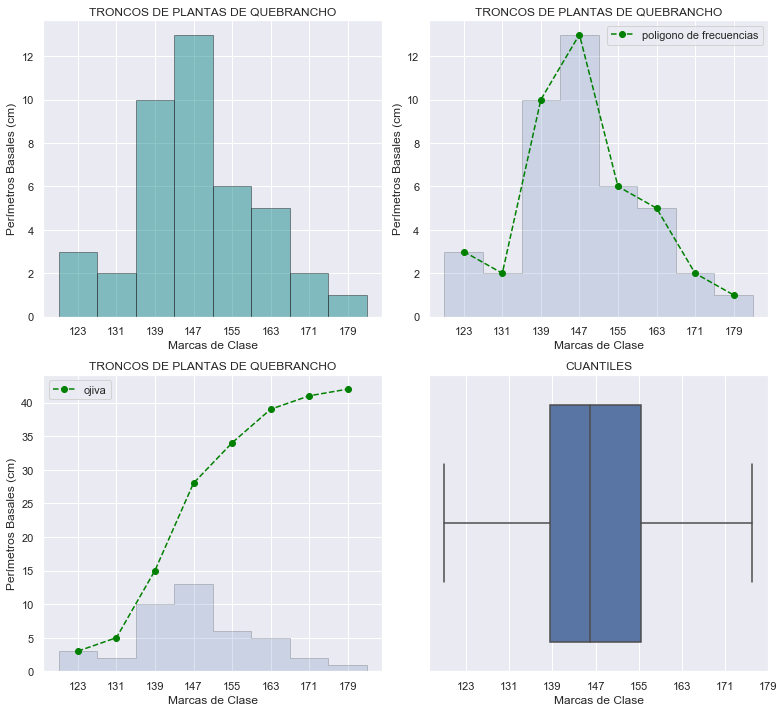

In [9]:
fig = plt.figure(figsize=(11,10))

# HISTOGRAMA:
""""""

ax1 = fig.add_subplot(221)

def intervalo(start, stop, step):
    i=start
    while i <= stop:
        i+=step
        yield i

# Ejecución de la función "intervalo" y alojamiento de los resultado en una variable llamda "l_inter"
l_inter=[]
for i in intervalo(np_datos.min(), np_datos.max(),rests):
    l_inter.append(i)

# Construimos los "bins" (marcas de clase) del histograma. Para ello es necesario agregar el dato menor y las marcas de clase en una sola lista de nombre "bins"
# para que la función hist(), de matplotlib, pueda tomar como parámetro "bins" a estos datos.

b1=[np_datos.min().tolist()]
b2=[float(b) for b in l_inter]
bins=b1+b2

plt.hist(np_datos, bins=bins, histtype='bar', edgecolor='k',alpha=.45, color='teal') 
plt.xticks(macl)
plt.ylabel('Perímetros Basales (cm)')
plt.xlabel('Marcas de Clase')
plt.title('TRONCOS DE PLANTAS DE QUEBRANCHO')

# POLÍGONO DE FRECUENCIAS:
""""""

ax2 = fig.add_subplot(222)

plt.plot(macl,frec_abs, color='green', marker='o', linestyle='dashed', )
plt.xticks(macl)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.hist(np_datos, bins=bins, histtype='stepfilled', edgecolor='k',alpha=0.2) 
plt.xticks(macl)
plt.ylabel('Perímetros Basales (cm)')
plt.xlabel('Marcas de Clase')
plt.title('TRONCOS DE PLANTAS DE QUEBRANCHO')
plt.legend(['poligono de frecuencias']) 

ax3 = fig.add_subplot(223)

plt.plot(macl,frec_abs_ac, color='green', marker='o', linestyle='dashed', )
plt.xticks(macl)
plt.ylabel('Frecuencia')
plt.xlabel('Marcas de Clase')
plt.hist(np_datos, bins=bins, histtype='stepfilled', edgecolor='k',alpha=0.2) 
plt.xticks(macl)
plt.ylabel('Perímetros Basales (cm)')
plt.xlabel('Marcas de Clase')
plt.title('TRONCOS DE PLANTAS DE QUEBRANCHO')
plt.legend(['ojiva']) 

ax4 = fig.add_subplot(224)

# QUANTILES:
""""""
q=sns.boxplot(np_datos)
plt.xticks(macl)
plt.title('CUANTILES')
plt.xlabel('Marcas de Clase')


fig.tight_layout()

### **Medidas de Dispersión**


In [10]:
print("El quartil Q1 (25%) : ", np.quantile(np_datos, .25)) 
print("El quartil Q2 (50%) : ", np.quantile(np_datos, .50)) 
print("El quartil Q3 (75%) : ", np.quantile(np_datos, .75))

# Cálculos usando el módulo Scipy Statistics "(numpy¶) functions" en el apartado de Averages and variances:
""""""
print("La varianza es igual a: "+str(np.var(np_datos)))
print("La desviasión estandar es ingual a: "+str(np.std(np_datos)))
print("El coeficiente de rrelación (Pearson) es ingual a: "+str(np.corrcoef(np_datos)))


# Cálculos usando el módulo Scipy Statistics "(scipy.stats) functions" en el apartado de Summary statistics:
""""""
print("El coeficiente de variación es aigual a: "+str(stats.variation(np_datos)))
print("La Curtosis es igual a : "+str(stats.kurtosis(np_datos)))

El quartil Q1 (25%) :  138.5
El quartil Q2 (50%) :  146.0
El quartil Q3 (75%) :  155.5
La varianza es igual a: 162.94331065759638
La desviasión estandar es ingual a: 12.764925015745153
El coeficiente de rrelación (Pearson) es ingual a: 1.0
El coeficiente de variación es aigual a: 0.08678000172568734
La Curtosis es igual a : -0.27311149320852257
